# This notebook contains extra code that was not used in the analysis but will be incorporated into analysis utilities codebase

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv_file = "/Users/robertjost/Fall_2025/Biogeochemistry/dust_dataHW1.csv"

In [ ]:
# concentration is g / ml, flux is g / m^2 / yr. g = mg/1000

dust_df = pd.read_csv(csv_file)


In [43]:
# Convert P and Ca concentrations from mg x ml-1 to a dimensionless value and then multiply by flux
dust_df["P_flux"] = (dust_df["P_conc"] /1000000) * dust_df["flux_gm2yr"]
dust_df["Ca_flux"] = (dust_df["Ca_conc"] /1000000) * dust_df["flux_gm2yr"]

In [44]:
# sort the dataframe according to the elevation gradient of the ecosystems
elevation_gradient = ["Plains", "Foothills", "Montane", "Subalpine", "Alpine"]

dust_df["Ecosystem"] = pd.Categorical(dust_df["Ecosystem"], categories=elevation_gradient, ordered=True)
dust_df_sorted = dust_df.sort_values(["Ecosystem", "Season"])

In [45]:
seasons = dust_df.groupby("Season", observed=True)
ecosystem = dust_df.groupby("Ecosystem", observed=True)

In [46]:
# Plotting variables
marker_types = ['o', 's', '^', 'D', 'v']
season_order = ["NDJ", "FMA", "MJ", "JAS"]
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
# grouped bar chart
bar_width = 0.15
x = np.arange(len(season_order))

In [ ]:
# extra - Scatter plot of P_flux by Season for each Ecosystem

plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    marker = marker_types[idx % len(marker_types)]
    plt.scatter(group["Season"], group["P_flux"], marker=marker, label=name)
plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("P Flux (g m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Annual P Flux by Season for Each Ecosystem", fontdict=font_titles)
plt.legend(title="Ecosystem")
plt.show()

In [ ]:
# extra - Scatter plot of Ca_flux by Season for each Ecosystem
plt.figure(figsize=(5,5))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    marker = marker_types[idx % len(marker_types)]
    plt.scatter(group["Season"], group["Ca_flux"], marker=marker, label=name)
plt.xlabel("Season")
plt.ylabel("Ca Flux (g m$^{-2}$ yr$^{-1}$)")
plt.title("Annual Ca Flux by Season for Each Ecosystem")
plt.legend(title="Ecosystem")
plt.show()

In [ ]:
# extra - refactor this function
def visualize_dataset(csv_path: str = None, df: pd.DataFrame = None, group_by: str = "Ecosystem") -> None:
    """
    Visualize ecosystem dataset using pandas and matplotlib.

    Parameters
    ----------
    csv_path : str, optional
        Path to the CSV file. Required if df is not provided.
    df : pandas.DataFrame, optional
        A DataFrame with the required columns:
        ['ID', 'Ecosystem', 'Season', 'P_conc', 'Ca_conc', 'flux_gm2yr'].
    group_by : str, default="Ecosystem"
        Column to group by in plots. Options: "Ecosystem", "Season", or None.

    Returns
    -------
    None
        Displays matplotlib plots (no return value).
    """
    if df is None:
        if csv_path is None:
            raise ValueError("Provide either a CSV file path or a DataFrame.")
        df = pd.read_csv(csv_path)

    # Validate group_by
    if group_by not in ["Ecosystem", "Season", None]:
        raise ValueError("group_by must be 'Ecosystem', 'Season', or None")

    # Ensure correct dtypes
    if "Ecosystem" in df.columns:
        df["Ecosystem"] = df["Ecosystem"].astype("category")
    if "Season" in df.columns:
        df["Season"] = df["Season"].astype("category")

    # 1. Boxplot of flux by group
    if group_by:
        plt.figure(figsize=(8, 5))
        df.boxplot(column="P_flux", by=group_by, grid=False)
        plt.title(f"Flux by {group_by}")
        plt.suptitle("")
        plt.xlabel(group_by)
        plt.ylabel("Flux (g/m²/yr)")
        plt.show()

    # 2. Scatter plot: P vs Ca (colored by group if specified)
    plt.figure(figsize=(7, 6))
    if group_by:
        for key, group in df.groupby(group_by):
            plt.scatter(group["Season"], group["P_flux"], label=key, alpha=0.7)
        plt.legend(title=group_by)
    else:
        plt.scatter(df["Season"], df["P_flux"], c="blue", alpha=0.7)
    plt.title(f"P vs Ca Concentration{' by ' + group_by if group_by else ''}")
    plt.xlabel("P concentration")
    plt.ylabel("Ca concentration")
    plt.show()

    # 3. Scatter plot: Flux vs P concentration
    plt.figure(figsize=(7, 6))
    if group_by:
        for key, group in df.groupby(group_by):
            plt.scatter(group["P_conc"], group["flux_gm2yr"], label=key, alpha=0.7)
        plt.legend(title=group_by)
    else:
        plt.scatter(df["P_conc"], df["flux_gm2yr"], c="blue", alpha=0.7)
    plt.title(f"Flux vs P Concentration{' by ' + group_by if group_by else ''}")
    plt.xlabel("P concentration")
    plt.ylabel("Flux (g/m²/yr)")
    plt.show()

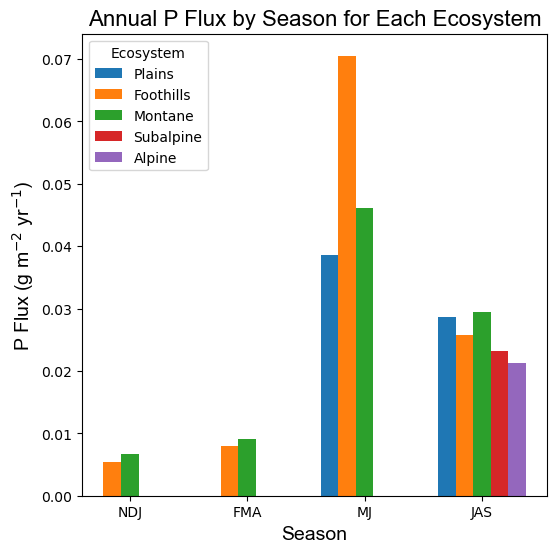

In [ ]:
# Grouped bar chart for P
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["P_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("P Flux (g m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Annual P Flux by Season for Each Ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
plt.show()

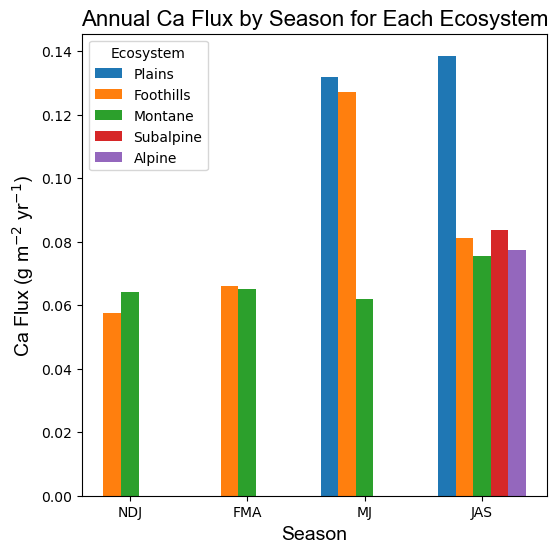

In [ ]:
# Grouped bar chart for Ca
plt.figure(figsize=(6,6))
for idx, (name, group) in enumerate(ecosystem):
    group = group.set_index("Season").reindex(season_order).reset_index()
    plt.bar(x + idx * bar_width, group["Ca_flux"], width=bar_width, label=name)

plt.xlabel("Season", fontdict=font_labels)
plt.ylabel("Ca Flux (g m$^{-2}$ yr$^{-1}$)", fontdict=font_labels)
plt.title("Annual Ca Flux by Season for Each Ecosystem", fontdict=font_titles)
plt.xticks(x + bar_width * (len(list(ecosystem)) - 1) / 2, season_order)
plt.legend(title="Ecosystem", loc="upper left")
plt.show()

In [ ]:
# extra maybe part 2
flux_df2 = pd.DataFrame()

# Phosphorus
flux_df2["P_flux_annual"] = ecosystem["P_flux"].sum()

# Calcium
flux_df2["Ca_flux_annual"] = ecosystem["Ca_flux"].sum()


$$\dfrac{g}{m^2\cdot yr} \cdot \dfrac{kg}{1000g} = \dfrac{kg}{1000m^2 \cdot yr}$$